<a href="https://colab.research.google.com/github/Sharzla/UniProjects/blob/main/TweetSentimentAnalysis_A171183.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TWEET SENTIMENT ANALYSIS
Prepared by : Shasha Arzila binti Tarmizi (A171183)

In [ ]:
import pandas as pd
import numpy as np
import re

Load csv files:

In [ ]:
tweets = pd.read_csv("tweets.csv")
tweets.head()

,Unnamed: 0,tweet_dt,topic,id,username,name,tweet,like_count,reply_count,retweet_count,retweeted
0,0,2021-01-26,#bustedseason3,1353887287847702529,oshvlt,ayi | busted s3 on netflix!,watching ep 7 now 🏃‍♀️ #SEHUN #세훈 #엑소세훈 #Buste...,0,0,0,False
1,1,2021-01-26,#bustedseason3,1353880914737172480,vlzzn,🕵🏻‍♂️🏹☠🏴🐥,"Woaaaah Oh Sehun's deductive skills in ep 6, w...",0,0,0,False
2,2,2021-01-26,#bustedseason3,1353880193933348864,amschelarapcnl,End the game book sponsor pls,Busted Season 4 plssssssss\n\n#BustedSeason3 \...,1,0,1,False
3,3,2021-01-26,#bustedseason3,1353878750048505857,morgan_swain,morgana (she/her) • bIm,STOP why is the closing sequence for the @Bust...,0,0,0,False
4,4,2021-01-26,#bustedseason3,1353877098306400258,ImYakini,Yakini(S9NE),"Busted did that ""copycat detectives"" episode a...",0,0,0,False


Create new dataframe containing tweets:

In [ ]:
df_tw = pd.DataFrame(tweets.iloc[:, 6])
df_tw.head()

,tweet
0,watching ep 7 now 🏃‍♀️ #SEHUN #세훈 #엑소세훈 #Buste...
1,"Woaaaah Oh Sehun's deductive skills in ep 6, w..."
2,Busted Season 4 plssssssss\n\n#BustedSeason3 \...
3,STOP why is the closing sequence for the @Bust...
4,"Busted did that ""copycat detectives"" episode a..."


In [ ]:
# rename tweet column
df_tw = df_tw.rename(columns={'tweet':'Tweet'})
df_tw.head(2)

,Tweet
0,watching ep 7 now 🏃‍♀️ #SEHUN #세훈 #엑소세훈 #Buste...
1,"Woaaaah Oh Sehun's deductive skills in ep 6, w..."


# Pre-Processing:

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#function to remove stop words
def remove_stopwords(text):
  tokenz = word_tokenize(text)
  stop_words = ['a', 'and', 'are', 'as', 'be','for', 'have',
                      'in', 'is', 'of', 'or', 'that','the', 'to', 'was', 'were']
    
  text_noSW = list()

  for i in range(0,len(tokenz)):

        if tokenz[i].lower() in stop_words:   # remember to make lower! 
            pass
        else:
            text_noSW.append(tokenz[i])

  return " ".join(text_noSW)

In [ ]:
# a function to clean tweets
def cleanUpTweet(txt):
    txt = re.sub(r'@[A-Za-z0-9_]+', '', txt) # Remove mentions
    txt = re.sub(r'#', '', txt) # Remove hashtags
    txt = re.sub(r'RT : ', '', txt) # Remove retweets
    txt = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', txt) # Remove urls
    txt = txt.replace('\n','')
    txt = remove_stopwords(txt)
    return txt

In [ ]:
df_tw['Tweet'] = df_tw['Tweet'].apply(cleanUpTweet)
df_tw.head()

,Tweet
0,watching ep 7 now 🏃‍♀️ SEHUN 세훈 엑소세훈 BustedSea...
1,"Woaaaah Oh Sehun 's deductive skills ep 6 , we..."
2,Busted Season 4 plssssssssBustedSeason3 Busted...
3,STOP why closing sequence season 3 finale maki...
4,Busted did `` copycat detectives '' episode ag...


# Lexicon Based Sentiment Analysis:

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
df_tw['Scores'] = df_tw['Tweet'].apply(lambda review: sid.polarity_scores(review))

df_tw.head()

,Tweet,Scores
0,watching ep 7 now 🏃‍♀️ SEHUN 세훈 엑소세훈 BustedSea...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,"Woaaaah Oh Sehun 's deductive skills ep 6 , we...","{'neg': 0.0, 'neu': 0.84, 'pos': 0.16, 'compou..."
2,Busted Season 4 plssssssssBustedSeason3 Busted...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,STOP why closing sequence season 3 finale maki...,"{'neg': 0.317, 'neu': 0.683, 'pos': 0.0, 'comp..."
4,Busted did `` copycat detectives '' episode ag...,"{'neg': 0.0, 'neu': 0.783, 'pos': 0.217, 'comp..."


In [ ]:
df_tw['Compound']  = df_tw['Scores'].apply(lambda score_dict: score_dict['compound'])

df_tw.head()

,Tweet,Scores,Compound
0,watching ep 7 now 🏃‍♀️ SEHUN 세훈 엑소세훈 BustedSea...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
1,"Woaaaah Oh Sehun 's deductive skills ep 6 , we...","{'neg': 0.0, 'neu': 0.84, 'pos': 0.16, 'compou...",0.2732
2,Busted Season 4 plssssssssBustedSeason3 Busted...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
3,STOP why closing sequence season 3 finale maki...,"{'neg': 0.317, 'neu': 0.683, 'pos': 0.0, 'comp...",-0.7213
4,Busted did `` copycat detectives '' episode ag...,"{'neg': 0.0, 'neu': 0.783, 'pos': 0.217, 'comp...",0.6124


In [ ]:
df_tw['Label'] = df_tw['Compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

df_tw.head()

,Tweet,Scores,Compound,Label
0,watching ep 7 now 🏃‍♀️ SEHUN 세훈 엑소세훈 BustedSea...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
1,"Woaaaah Oh Sehun 's deductive skills ep 6 , we...","{'neg': 0.0, 'neu': 0.84, 'pos': 0.16, 'compou...",0.2732,pos
2,Busted Season 4 plssssssssBustedSeason3 Busted...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
3,STOP why closing sequence season 3 finale maki...,"{'neg': 0.317, 'neu': 0.683, 'pos': 0.0, 'comp...",-0.7213,neg
4,Busted did `` copycat detectives '' episode ag...,"{'neg': 0.0, 'neu': 0.783, 'pos': 0.217, 'comp...",0.6124,pos


In [ ]:
df_tw['Label'].value_counts()

pos    1643
neg     357
Name: Label, dtype: int64

In [ ]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

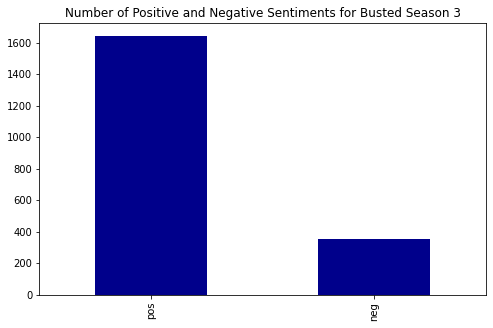

In [ ]:
df_tw['Label'].value_counts().plot(kind='bar', figsize=(8, 5), color='darkblue')

plt.title('Number of Positive and Negative Sentiments for Busted Season 3') 

plt.show()

# Machine Learning Sentiment Analysis

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
df_sent = pd.DataFrame(df_tw.iloc[:, [0,3]])
df_sent.head()

,Tweet,Label
0,watching ep 7 now 🏃‍♀️ SEHUN 세훈 엑소세훈 BustedSea...,pos
1,"Woaaaah Oh Sehun 's deductive skills ep 6 , we...",pos
2,Busted Season 4 plssssssssBustedSeason3 Busted...,pos
3,STOP why closing sequence season 3 finale maki...,neg
4,Busted did `` copycat detectives '' episode ag...,pos


In [ ]:
# extracting features
def extract_features(df,field,training_data,testing_data):
  cv= CountVectorizer(binary=False, max_df=0.95)
  cv.fit_transform(training_data[field].values)
  train_feature_set=cv.transform(training_data[field].values)
  test_feature_set=cv.transform(testing_data[field].values)
  return train_feature_set,test_feature_set,cv

In [ ]:
#create features
#field  - column name contains the review text
field = 'Tweet'

# GET A TRAIN TEST SPLIT (set seed for consistent results)
training_data,testing_data = train_test_split(df_sent,random_state = 2000)
# GET FEATURES
X_train,X_test, feature_transformer=extract_features(df_sent,field,training_data,testing_data)
# GET LABELS
Y_train=training_data['Label'].values
Y_test=testing_data['Label'].values

In [ ]:
#build the classifier model - naives bayes
from sklearn.naive_bayes import MultinomialNB
model_nb = MultinomialNB().fit(X_train, Y_train)
nb_predicted= model_nb.predict(X_test)
print("MultinomialNB Accuracy with CountVectorizer:",metrics.accuracy_score(Y_test, nb_predicted))

MultinomialNB Accuracy with CountVectorizer: 0.86
